In [12]:
'''import yfinance as fy
df=fy.download("TSLA",start="2024-01-01",end="2025-01-03")
df.to_excel("tesla_stock.xlsx")
print("done")'''

'import yfinance as fy\ndf=fy.download("TSLA",start="2024-01-01",end="2025-01-03")\ndf.to_excel("tesla_stock.xlsx")\nprint("done")'

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [129]:
df1=pd.read_excel(r"C:\Users\hkoli\Downloads\tesla_stock.xlsx")
df2=pd.read_excel(r"C:\Users\hkoli\Downloads\tesla_stock.xlsx")
df1.head()

,Date,Close,High,Low,Open,Volume
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


In [15]:
df1.isnull().any()

Date      False
Close     False
High      False
Low       False
Open      False
Volume    False
dtype: bool

In [16]:
df1.duplicated().any()

False

In [17]:
df1.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    253 non-null    datetime64[ns]
 1   Close   253 non-null    float64       
 2   High    253 non-null    float64       
 3   Low     253 non-null    float64       
 4   Open    253 non-null    float64       
 5   Volume  253 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 12.0 KB


## Descriptive Statistics
What are the mean, median, and standard deviation of Tesla's closing prices over the dataset's timeframe?

What is the range of Tesla’s daily high and low prices?

What is the skewness and kurtosis of Tesla’s closing prices?

In [20]:
describe= df1[['Close', 'High', 'Low', 'Open', 'Volume']].describe()
describe

,Close,High,Low,Open,Volume
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,231.202569,236.208221,226.076166,231.211226,9.489294e+07
std,71.462740,73.723518,68.901479,71.629194,3.327540e+07
min,142.050003,144.440002,138.800003,140.559998,3.716760e+07
25%,180.009995,184.589996,177.000000,182.000000,7.197550e+07
50%,210.729996,216.130005,207.750000,212.259995,8.739170e+07
75%,248.979996,252.369995,242.649994,247.710007,1.099823e+08
max,479.859985,488.540009,457.510010,475.899994,2.438697e+08


In [21]:
#What is the range of Tesla’s daily high and low prices?
range=df1["High"]-df1["Low"]
range

0       6.839996
1       9.359985
2       4.970001
3       5.220001
4       5.949997
         ...    
248    14.309998
249    23.500000
250    11.250000
251    25.389984
252    19.690002
Length: 253, dtype: float64

In [22]:
# What is the skewness and kurtosis of Tesla’s clsoing prices?
import scipy.stats as stats
closing_price_skewness=stats.skew(df1["Close"])
closing_price_kurtosis=stats.kurtosis(df1["Close"])
print("skewnwss:" ,closing_price_skewness)
print("kurtosis",closing_price_kurtosis)

skewnwss: 1.6400950036865678
kurtosis 2.09873203570453


## Probability & Distributions
What is the probability that Tesla’s closing price will be above a certain threshold (e.g., $250) based on historical data?

What is the probability that Tesla’s stock price will fall below $200 on any given day based on past trends?

What is the probability that Tesla’s stock price will remain between $220 and $280 on any given day?

In [24]:
#What is the probability that Tesla’s closing price will be above a certain threshold (e.g., $250) based on historical data?
threshold = 250
close_mean=df1["Close"].mean()
close_std=df1["Close"].std()
proba=1-stats.norm.cdf(threshold,loc=close_mean,scale=close_std)
proba

0.39626056810777044

In [25]:
# What is the probability that Tesla’s stock price will fall below $200 on any given day based on past trends?
threshold=200
close_mean=df1["Close"].mean()
close_std=df1["Close"].std()
probabtiltiy_fall=stats.norm.cdf(threshold,loc=close_mean,scale=close_std)*100
print(f"probabtiltiy_fall {probabtiltiy_fall :.2f}%")

probabtiltiy_fall 33.12%


In [31]:
# What is the probability that Tesla’s stock price will remain between $220 and $280 on any given day?
threshold1=220
threshold2=280
close_mean=df1["Close"].mean()
close_std=df1["Close"].std()
prob1=stats.norm.cdf(threshold1,loc=close_mean,scale=close_std)
prob2=stats.norm.cdf(threshold2,loc=close_mean,scale=close_std)
prob_between=(prob2-prob1)*100
print(prob_between)



31.492858655572558


## Hypothesis Testing
Is there a significant difference between Tesla’s opening and closing prices? (Paired t-test)

the correlation between Open and Close prices

In [41]:
# Is there a significant difference between Tesla’s opening and closing prices? (Paired t-test)
t_test,p_value=stats.ttest_rel(df1["Open"],df1["Close"])
print(f"T-statistic: {t_test:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value<0.05:
    print("reject null hypothesis")
else:
    print("fail to reject h1")

T-statistic: 0.0195
P-value: 0.9845
fail to reject h1


In [45]:
df1[["Open","Close"]].corr()

,Open,Close
Open,1.000000,0.995114
Close,0.995114,1.000000


 ## Visualization
1️How has Tesla's stock price changed over time? (Line Chart)

2 What is the distribution of Tesla's daily returns? (Histogram & KDE Plot)

3 Is there a relationship between trading volume and daily price changes? (Scatter Plot)

4 "How does Tesla’s stock price trend over time using 7-day and 30-day moving averages?"

5 Can we visualize a candlestick chart for TCS stock?

6 What is the correlation between different stock metrics (Open, Close, High, Low, Volume)? (Heatmap)

7 Do Tesla's daily returns follow a normal distribution? (Q-Q Plot)




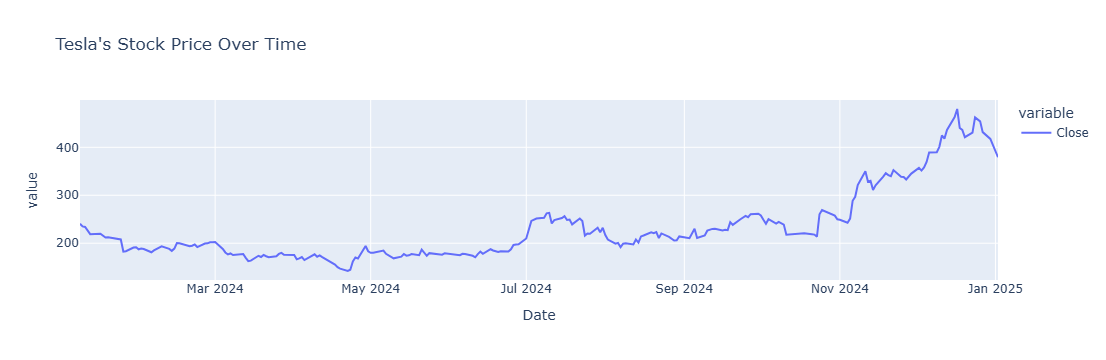

In [207]:
#How has Tesla's stock price changed over time? (Line Chart)
fig=px.line(df1,x=df1["Date"],y=["Close"], title="Tesla's Stock Price Over Time", labels={"Close": "Closing Price ($)"})
fig.write_image("line.png")
fig.show()

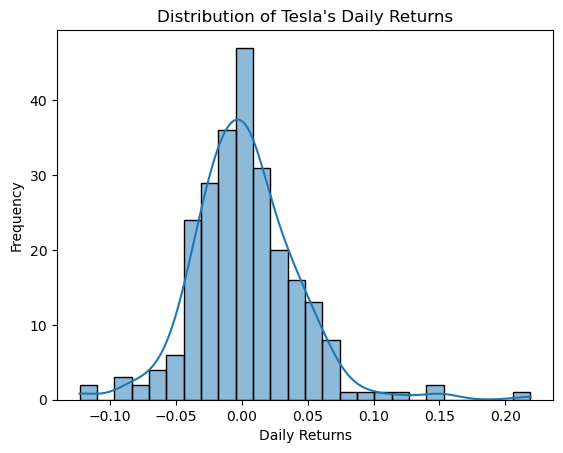

In [209]:
# What is the distribution of Tesla's daily returns? (Histogram & KDE Plot)
df1["daily return"]=df1["Close"].pct_change()
sns.histplot(df1["daily return"],kde=True)
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.title("Distribution of Tesla's Daily Returns")
plt.savefig("histo.png", dpi=300, bbox_inches='tight')  

plt.show()

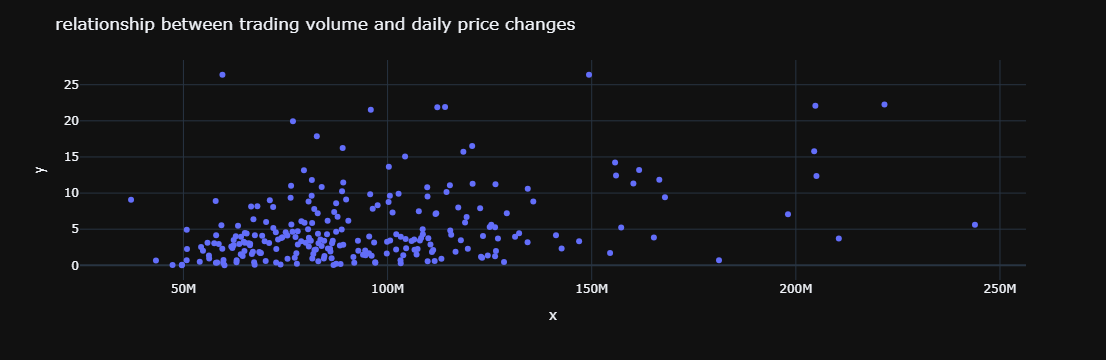

In [211]:
 # Is there a relationship between trading volume and daily price changes? (Scatter Plot)
df1["daily change"]=abs(df1["Close"]-df1["Open"])

fig=px.scatter(x=df1["Volume"],y=df1["daily change"])
fig.update_layout(title="relationship between trading volume and daily price changes",
                 template="plotly_dark")
fig.write_image("scatter.png")
fig.show()

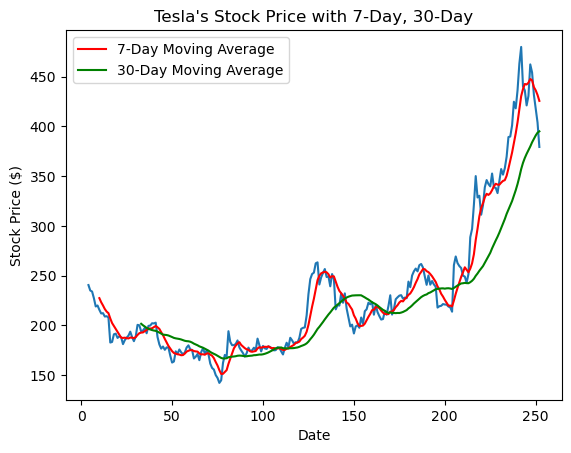

In [213]:
# "How does Tesla’s stock price trend over time using 7-day and 30-day moving averages?"
df1["7_days_ma"]=df1["Close"].rolling(window=7).mean()
df1["30_days_ma"]=df1["Close"].rolling(window=30).mean()
plt.plot(df1["Close"])
plt.plot(df1["7_days_ma"], label="7-Day Moving Average", color="red")
plt.plot(df1["30_days_ma"], label="30-Day Moving Average", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price ($)")
plt.title("Tesla's Stock Price with 7-Day, 30-Day")
plt.savefig("moving.png", dpi=300, bbox_inches='tight')  
plt.legend()


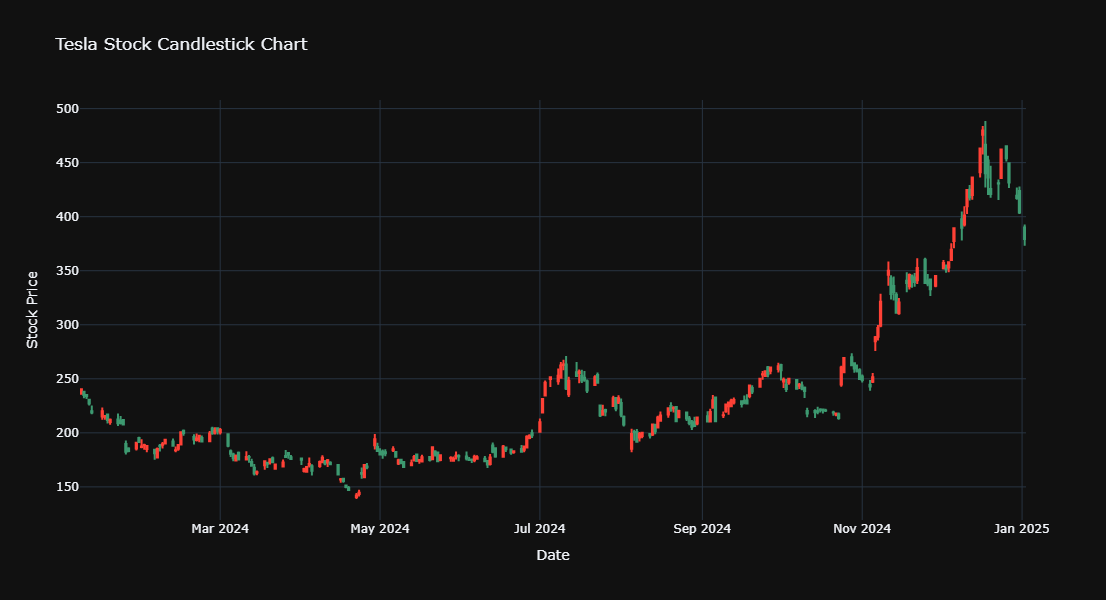

In [215]:
# Can we visualize a candlestick chart for TCS stock?
fig=go.Figure(data=go.Candlestick(x=df1["Date"],
    open=df1["Close"],
    close=df1["Open"],
    high=df1["High"],
    low=df1["Low"]))
fig.update_layout(
    title="Tesla Stock Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Stock Price",
    xaxis_rangeslider_visible=False,  
    template="plotly_dark",  
     width=1000, height=600
)
fig.write_image("c.png")
fig.show()

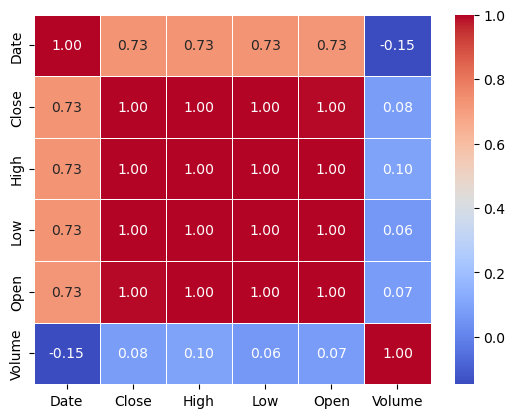

In [219]:
# What is the correlation between different stock metrics (Open, Close, High, Low, Volume)? (Heatmap)
sns.heatmap(df2.corr(),annot=True,cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.savefig("heat.png", dpi=300, bbox_inches='tight')  

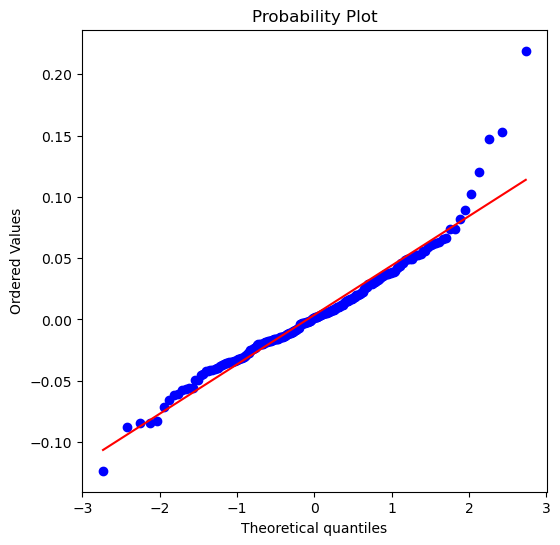

In [223]:
# Do Tesla's daily returns follow a normal distribution? (Q-Q Plot)
df1=df1.dropna()
fig,ax=plt.subplots(figsize=(6,6))
stats.probplot(df1["Daily Return"],dist="norm",plot=ax)
plt.savefig("proba.png", dpi=300, bbox_inches='tight') 
plt.show()